<a href="https://colab.research.google.com/github/NoahStefancik-UR/CSC241_Assignments/blob/main/CSC241_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Undergrad Student: Noah Stefancik

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMG_0487.jpeg to IMG_0487.jpeg
Saving IMG_0488.jpeg to IMG_0488.jpeg


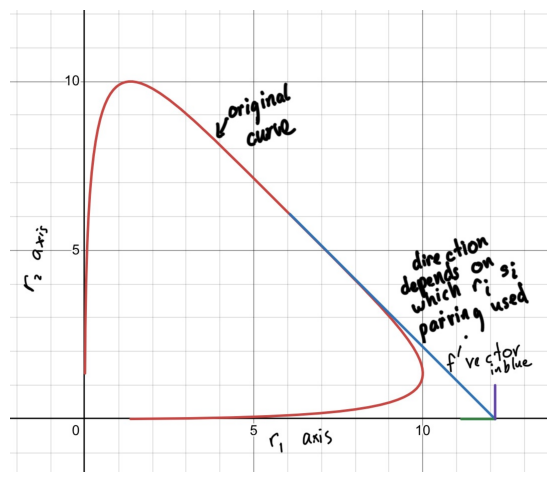

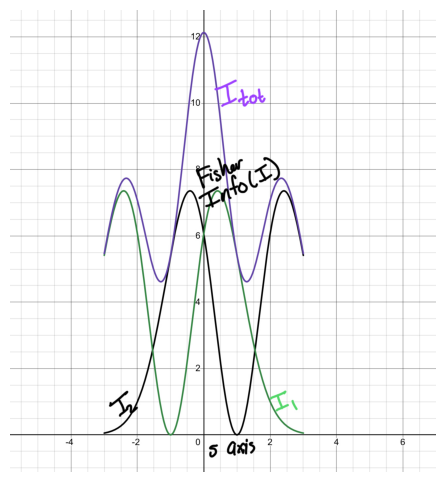

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("IMG_0487.jpeg")  # replace with your uploaded filename
plt.figure(figsize=(8,6))  # adjust size as needed
plt.imshow(img)
plt.axis('off')
plt.show()
img = Image.open("IMG_0488.jpeg")  # replace with your uploaded filename
plt.figure(figsize=(8,6))  # adjust size as needed
plt.imshow(img)
plt.axis('off')
plt.show()


The value s where the population consisting of these 2 neurons is most sensitive for discriminating two nearby stimuli is at s=0 since I_tot is maximized at this point.

Question 1.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def von_mises(c, phi, phi_pref, kappa = 1, f_0 = 5, f_max = 20):
  val = f_0 + c * (f_max - f_0) * np.exp(kappa * (np.cos((2 * (phi-phi_pref))) - 1))
  return val
def single_trial(c, phi, phi_pref):
    mean_rates = von_mises(c, phi, phi_pref)
    return np.random.poisson(mean_rates)

nuerons = np.linspace(0, np.pi, 100, endpoint = False)

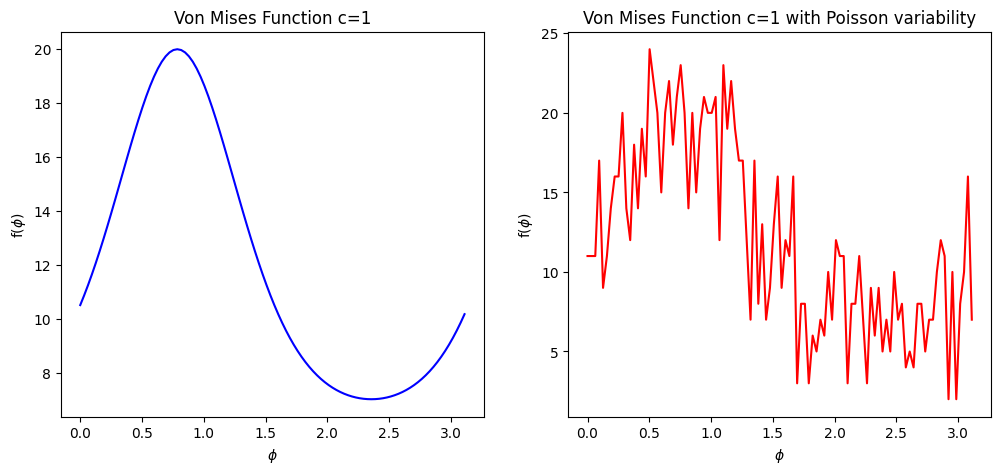

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Von Mises Function c=1")
ax1.set_xlabel("$\\phi$")
ax1.set_ylabel("f($\\phi$)")
func_vals = von_mises(1, np.pi / 4, nuerons)
ax1.plot(nuerons, func_vals, color='blue')

ax2.set_title("Von Mises Function c=1 with Poisson variability")
ax2.set_xlabel("$\\phi$")
ax2.set_ylabel("f($\\phi$)")
func_vals = single_trial(1, np.pi / 4, nuerons)
ax2.plot(nuerons, func_vals, color='red')
plt.show()


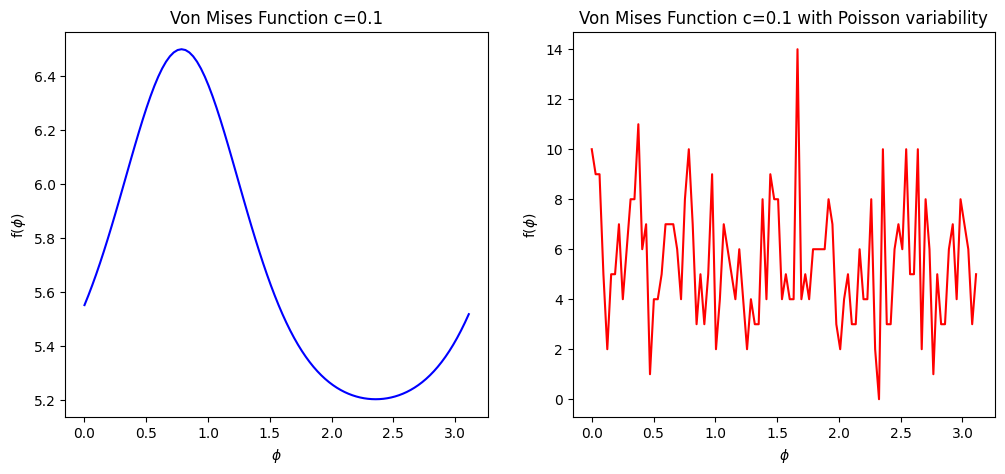

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_title("Von Mises Function c=0.1")
ax1.set_xlabel("$\\phi$")
ax1.set_ylabel("f($\\phi$)")
func_vals = von_mises(0.1, np.pi / 4, nuerons)
ax1.plot(nuerons, func_vals, color='blue')

ax2.set_title("Von Mises Function c=0.1 with Poisson variability")
ax2.set_xlabel("$\\phi$")
ax2.set_ylabel("f($\\phi$)")
func_vals = single_trial(0.1, np.pi / 4, nuerons)
ax2.plot(nuerons, func_vals, color='red')
plt.show()


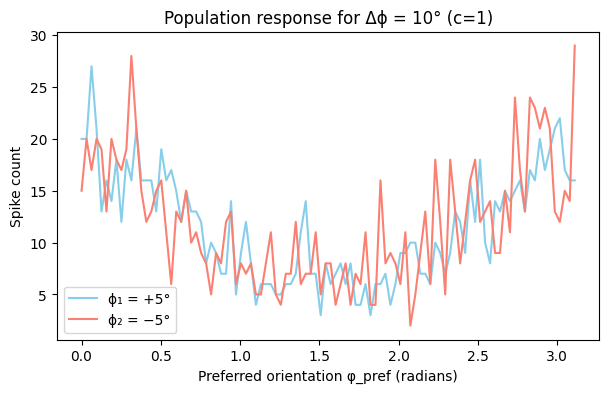

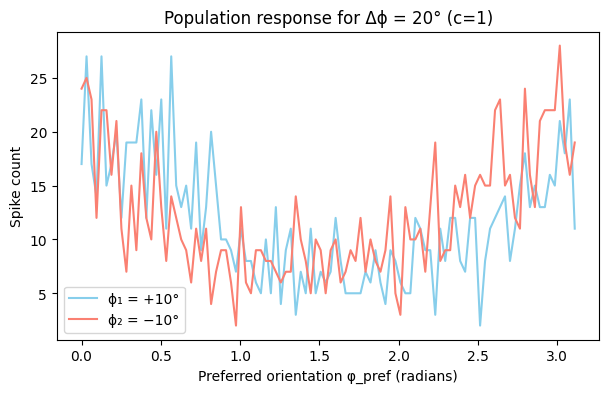

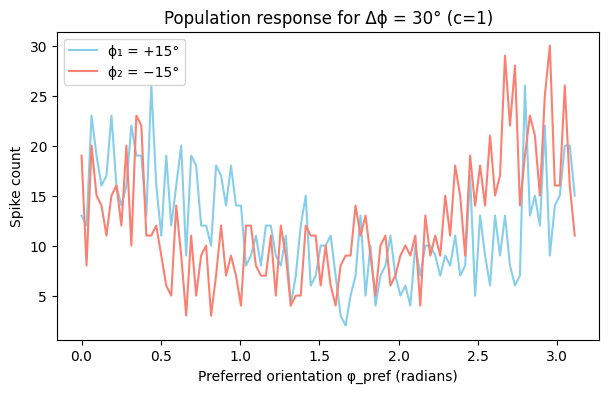

In [ ]:
dphis = np.deg2rad([10, 20, 30])

for dphi in dphis:
    phi1 = dphi / 2
    phi2 = -dphi / 2

    resp1 = single_trial(1, phi1, nuerons)
    resp2 = single_trial(1, phi2, nuerons)

    plt.figure(figsize=(7, 4))
    plt.title(f"Population response for Δϕ = {np.rad2deg(dphi):.0f}° (c=1)")
    plt.xlabel("Preferred orientation φ_pref (radians)")
    plt.ylabel("Spike count")
    plt.plot(nuerons, resp1, label=f"ϕ₁ = +{np.rad2deg(phi1):.0f}°", color='skyblue')
    plt.plot(nuerons, resp2, label=f"ϕ₂ = −{np.rad2deg(phi1):.0f}°", color='salmon')
    plt.legend()
    plt.show()

Here we are able to able to tell an orientation pair apart(negative and positive). The positive orientation is given in skyblue while the negative orientation is given in salmon. The nerative orientation graph seems to be a reflection of the positive one across π/2 and vice versa (also could be a shift), although this is just a qualitative thought and not actually verified. It is easier to tell them responses apart when Δϕ is larger.

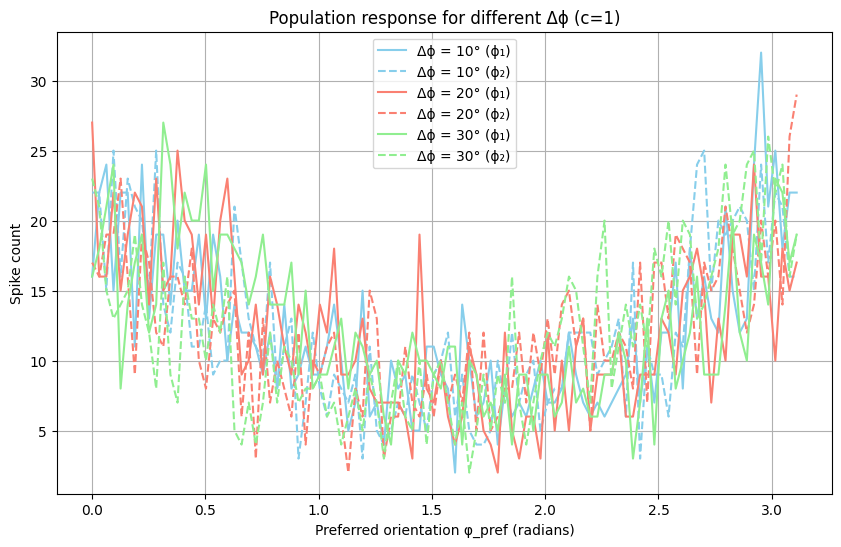

In [ ]:
dphis = np.deg2rad([10, 20, 30])
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(10, 6))
plt.title("Population response for different Δϕ (c=1)")
plt.xlabel("Preferred orientation φ_pref (radians)")
plt.ylabel("Spike count")

for i, dphi in enumerate(dphis):
    phi1 = dphi / 2
    phi2 = -dphi / 2

    resp1 = single_trial(1, phi1, nuerons)
    resp2 = single_trial(1, phi2, nuerons)

    color = colors[i % len(colors)]
    plt.plot(nuerons, resp1, label=f"Δϕ = {np.rad2deg(dphi):.0f}° (ϕ₁)", color=color, linestyle='-')
    plt.plot(nuerons, resp2, label=f"Δϕ = {np.rad2deg(dphi):.0f}° (ϕ₂)", color=color, linestyle='--')

plt.legend()
plt.grid(True)
plt.show()

Here we can see the green curves "sandwhich" the salmon curves which "sandwhich" the skyblue curve. As Δ increases the negative and positive orienations shift farther away from each other which results in this "sandwhich" idea. We can both tell the positive and negative orientaitons apart as well as the orienations for different Δ magnitidues although it is tricky to see that in this graph.

b.)




In [ ]:
f_values = von_mises(1, 0, nuerons)
C = np.diag(f_values)


I think this is all the question is asking, here f =σ^2.

c.)

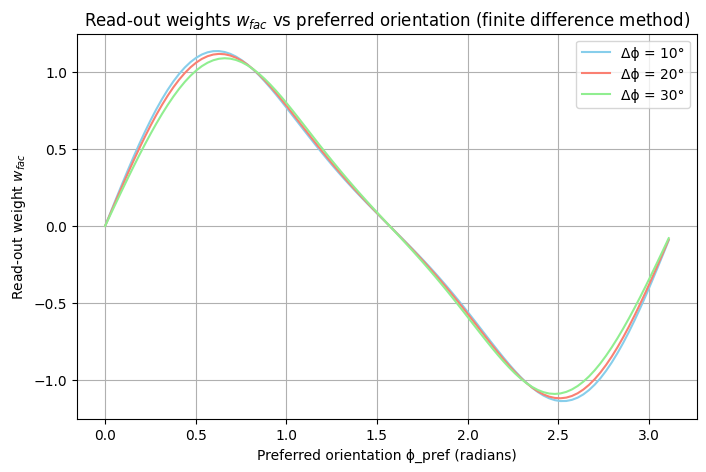

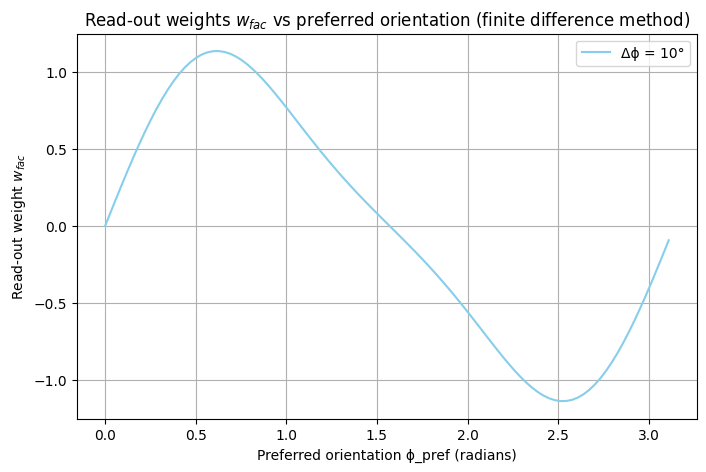

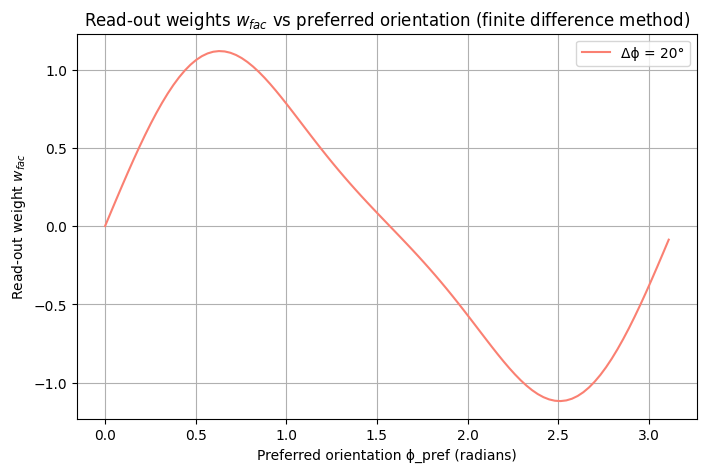

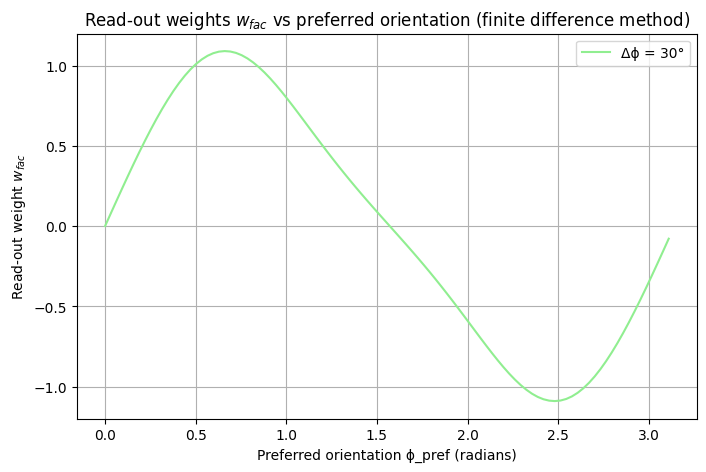

In [ ]:
C_inv = np.linalg.inv(C)

d_phis = np.deg2rad([10, 20, 30])
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.title("Read-out weights $w_{fac}$ vs preferred orientation (finite difference method)")
plt.xlabel("Preferred orientation ϕ_pref (radians)")
plt.ylabel("Read-out weight $w_{fac}$")

for i, dphi in enumerate(d_phis):

    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, nuerons)
    f2 = von_mises(1, phi2, nuerons)

    delta_f = (f1 - f2)/(dphi)
    w_fac = C_inv @ delta_f

    plt.plot(nuerons, w_fac, label=f"Δϕ = {np.rad2deg(dphi):.0f}°", color=colors[i])

plt.legend()
plt.grid(True)
plt.show()



for i, dphi in enumerate(d_phis):
    plt.figure(figsize=(8, 5))
    plt.title("Read-out weights $w_{fac}$ vs preferred orientation (finite difference method)")
    plt.xlabel("Preferred orientation ϕ_pref (radians)")
    plt.ylabel("Read-out weight $w_{fac}$")

    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, nuerons)
    f2 = von_mises(1, phi2, nuerons)

    delta_f = (f1 - f2)/(dphi)
    w_fac = C_inv @ delta_f

    plt.plot(nuerons, w_fac, label=f"Δϕ = {np.rad2deg(dphi):.0f}°", color=colors[i])

    plt.legend()
    plt.grid(True)
    plt.show()


Again describing the relationship from just qualitatively observing the resulting graphs is sure to iss some details. That being said it looks like the graphs are periodic in π. As Δϕ increases in seems that the read-out weights slightly change. It is a very small change but the peak of the maximum and minimum are at a lower and higher ϕ, respectively, when Δϕ is smaller. It may be possible that the magnitude of the maximum and minimum are larger when Δϕ is smaller as well but I'm not entirely sure on this.

d.)

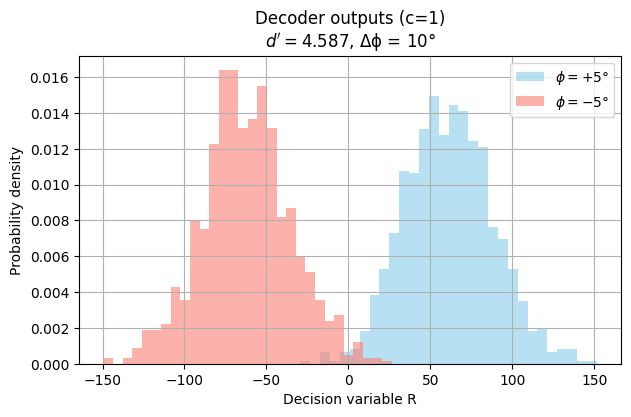

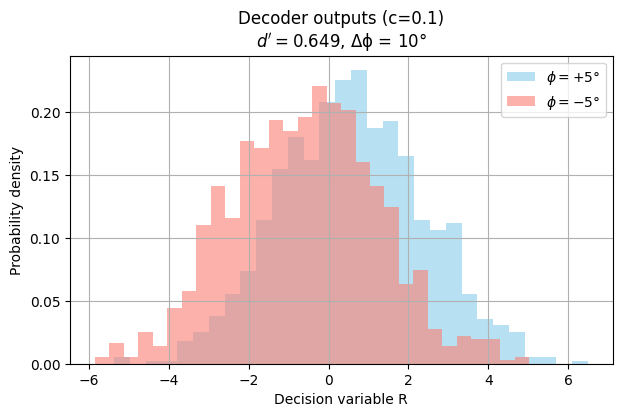

In [ ]:
phi_1 = np.deg2rad(5)
phi_2 = -np.deg2rad(5)
for c in [1, 0.1]:

    f_phi1 = von_mises(c, phi_1, nuerons)
    f_phi2 = von_mises(c, phi_2, nuerons)

    df = (von_mises(c, phi_1, nuerons) - von_mises(c, phi_2, nuerons)) / (phi_1 - phi_2)

    w_fac = C_inv @ df

    R_phi1, R_phi2 = [], []

    for _ in range(1000):
        r1 = np.random.poisson(f_phi1)
        r2 = np.random.poisson(f_phi2)
        R_phi1.append(w_fac @ r1)
        R_phi2.append(w_fac @ r2)

    R_phi1, R_phi2 = np.array(R_phi1), np.array(R_phi2)

    d_prime = (np.mean(R_phi1) - np.mean(R_phi2)) / np.sqrt(0.5 * (np.var(R_phi1) + np.var(R_phi2)))

    plt.figure(figsize=(7, 4))
    plt.hist(R_phi1, bins=30, alpha=0.6, color='skyblue', label=r"$\phi = +5°$", density=True)
    plt.hist(R_phi2, bins=30, alpha=0.6, color='salmon', label=r"$\phi = -5°$", density=True)
    plt.xlabel("Decision variable R")
    plt.ylabel("Probability density")
    plt.title(f"Decoder outputs (c={c})\n$d' = {d_prime:.3f}$, Δϕ = 10°")
    plt.legend()
    plt.grid(True)
    plt.show()

The two histograms for smaller contrast are flatter and overlap more. The d' value is lower for smaller contrast and the distributions are closer together. Higher contrast leads to better discriminability.

e.)

/tmp/ipython-input-2362589917.py:30: RuntimeWarning: invalid value encountered in scalar divide
  d_prime = (np.mean(R_phi1) - np.mean(R_phi2)) / np.sqrt(0.5 * (np.var(R_phi1) + np.var(R_phi2)))


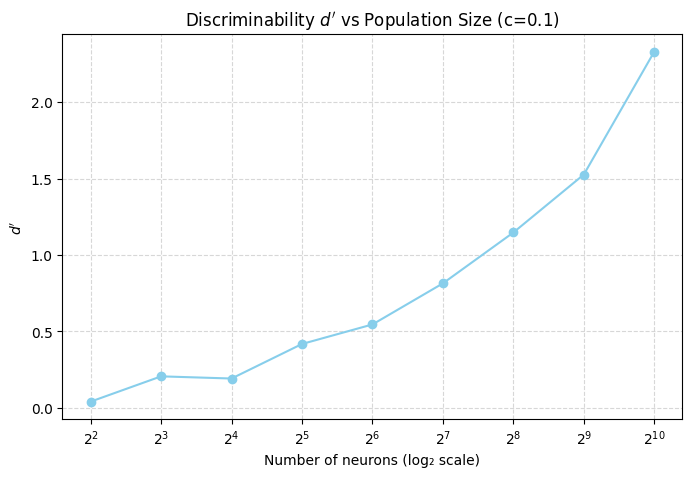

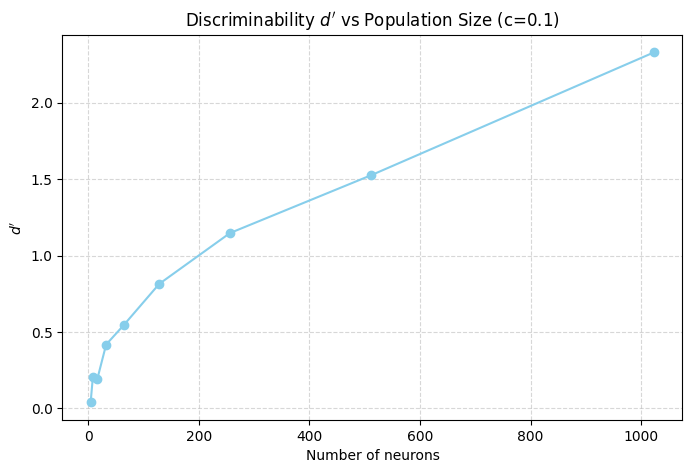

In [ ]:
c = 0.1
phi1 = np.deg2rad(5)
phi2 = -np.deg2rad(5)
n_values = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

d_prime_vals = []

for n in n_values:
    neurons = np.linspace(0, np.pi, n)

    f_phi1 = von_mises(c, phi1, neurons, kappa = 1)
    f_phi2 = von_mises(c, phi2, neurons, kappa = 1)

    C_inv = np.diag(1 / f_phi1)

    df = (f_phi1 - f_phi2) / (phi1 - phi2)

    w_fac = C_inv @ df

    R_phi1, R_phi2 = [], []
    for _ in range(1000):
        r1 = np.random.poisson(f_phi1)
        r2 = np.random.poisson(f_phi2)
        R_phi1.append(w_fac @ r1)
        R_phi2.append(w_fac @ r2)

    R_phi1 = np.array(R_phi1)
    R_phi2 = np.array(R_phi2)

    d_prime = (np.mean(R_phi1) - np.mean(R_phi2)) / np.sqrt(0.5 * (np.var(R_phi1) + np.var(R_phi2)))
    d_prime_vals.append(d_prime)

plt.figure(figsize=(8,5))
plt.plot(n_values, d_prime_vals, marker='o', color='skyblue')
plt.xscale('log', base=2)
plt.xlabel("Number of neurons (log₂ scale)")
plt.ylabel(r"$d'$")
plt.title(r"Discriminability $d'$ vs Population Size (c=0.1)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


plt.figure(figsize=(8,5))
plt.plot(n_values, d_prime_vals, marker='o', color='skyblue')
plt.xlabel("Number of neurons")
plt.ylabel(r"$d'$")
plt.title(r"Discriminability $d'$ vs Population Size (c=0.1)")
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()


The discriminability d' of a population of n neurons increases with n at a rate that looks to be assymptotically approaching some value. The slope is always positive it just slows down the growth of d' as n increases.

f.)

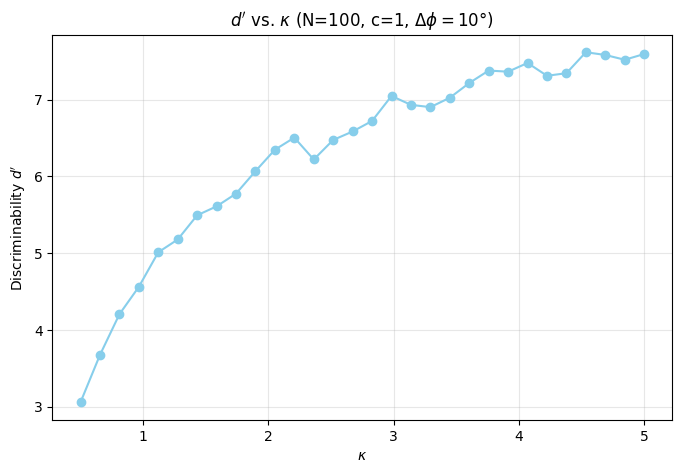

In [ ]:
c = 1
n_neurons = 100
neurons = np.linspace(0, np.pi, n_neurons)
phi1 = np.deg2rad(5)
phi2 = -np.deg2rad(5)
kappa_values = np.linspace(0.5, 5, 30)

d_prime_vals = []

for kappa in kappa_values:
    f_phi1 = von_mises(c, phi1, neurons, kappa)
    f_phi2 = von_mises(c, phi2, neurons, kappa)

    df = (f_phi1 - f_phi2) / (phi1 - phi2)

    C_inv = np.diag(1 / np.maximum(f_phi1, 1e-8))

    w_fac = C_inv @ df

    R_phi1, R_phi2 = [], []
    for _ in range(1000):
        r1 = np.random.poisson(f_phi1)
        r2 = np.random.poisson(f_phi2)
        R_phi1.append(w_fac @ r1)
        R_phi2.append(w_fac @ r2)

    R_phi1, R_phi2 = np.array(R_phi1), np.array(R_phi2)

    d_prime = (np.mean(R_phi1) - np.mean(R_phi2)) / np.sqrt(0.5 * (np.var(R_phi1) + np.var(R_phi2)))
    d_prime_vals.append(d_prime)

plt.figure(figsize=(8,5))
plt.plot(kappa_values, d_prime_vals, color='skyblue', marker='o')
plt.xlabel(r"$\kappa$")
plt.ylabel(r"Discriminability $d'$")
plt.title(r"$d'$ vs. $\kappa$ (N=100, c=1, $\Delta\phi=10°$)")
plt.grid(True, alpha=0.3)
plt.show()


The discriminability d' increases with κ in what looks to be another asymptotical growth. The slope is always positive for κ from 0.5 to 5.

Question 2.)

a.)

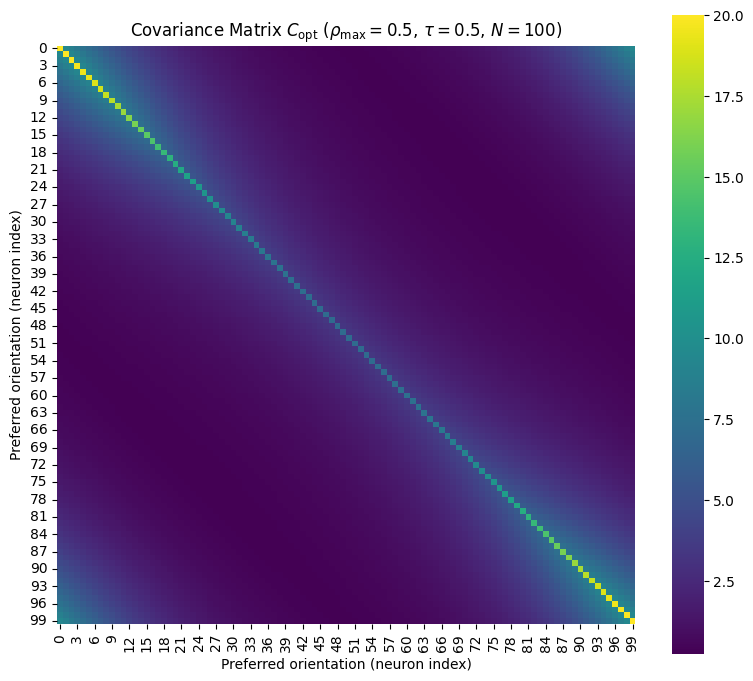

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N = 100
rho_max = 0.5
tau = 0.5
kappa = 1
f_max = 20
f_0 = 5
c = 1
phi_1 = np.deg2rad(5)
phi_2 = np.deg2rad(-5)

phis = np.linspace(0, np.pi, N, endpoint = False)


rho = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            rho[i, j] = 1.0
        else:
            delta_phi = np.abs(np.mod(np.abs(phis[i] - phis[j]) + np.pi/2, np.pi) - np.pi/2)
            rho[i, j] = rho_max * np.exp(-delta_phi / tau)

f_values = von_mises(c, 0, phis)

C_opt = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        C_opt[i, j] = rho[i, j] * np.sqrt(f_values[i] * f_values[j])

plt.figure(figsize=(8, 7))
sns.heatmap(C_opt, cmap="viridis", square=True)
plt.title(r"Covariance Matrix $C_{\mathrm{opt}}$ ($\rho_{\max}=0.5$, $\tau=0.5$, $N=100$)")
plt.xlabel("Preferred orientation (neuron index)")
plt.ylabel("Preferred orientation (neuron index)")
plt.tight_layout()
plt.show()



b.)

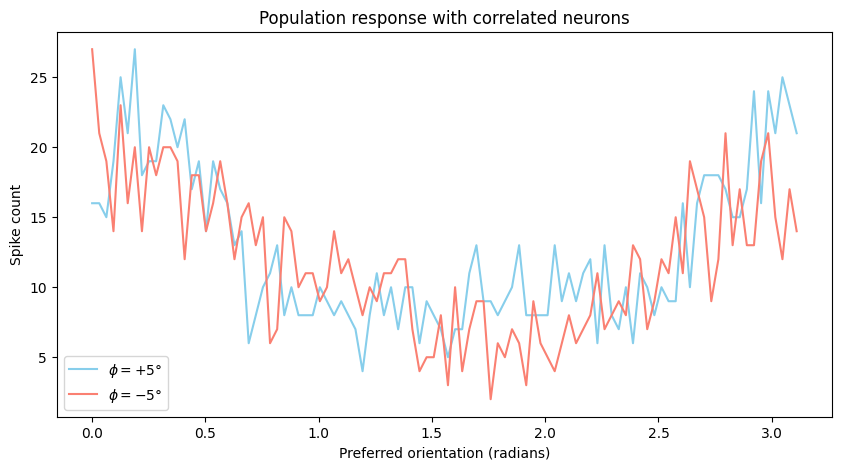

In [ ]:
f_values_pos = von_mises(c, phi_1, phis)
f_values_neg = von_mises(c, phi_2, phis)

r_phi1 = np.random.multivariate_normal(f_values_pos, C_opt)
r_phi2 = np.random.multivariate_normal(f_values_neg, C_opt)

r_phi1 = np.clip(np.round(r_phi1), 0, None)
r_phi2 = np.clip(np.round(r_phi2), 0, None)

plt.figure(figsize=(10, 5))
plt.plot(phis, r_phi1, label=r"$\phi = +5°$", color='skyblue')
plt.plot(phis, r_phi2, label=r"$\phi = -5°$", color='salmon')
plt.xlabel("Preferred orientation (radians)")
plt.ylabel("Spike count")
plt.title("Population response with correlated neurons")
plt.legend()
plt.show()


The population responses from part 1a are less smooth than the reponses shown here. The is a similar range (although it seems to be shifted a bit down, this might be due to just the simulation aspect) and maximal points align with the shape. The blue curves is the salmon curve just flipped across the vertical line at π/2. The only difference I see is just in the smoothness of the curves. Overall very similar, I believe this smoothness could be due to the fact that since neurons are correlated in this model that somehow this leads to a more constant or less variable output of spike count. The distance between each segment of π/100 is less jumpy (can't think of a good quantative work to describe this).

c.)

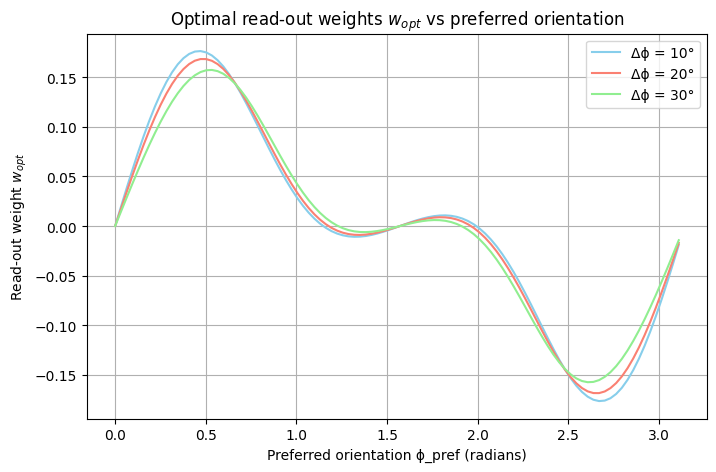

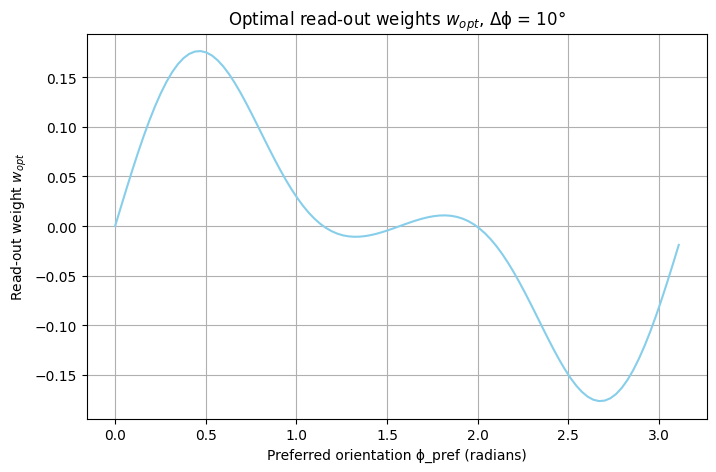

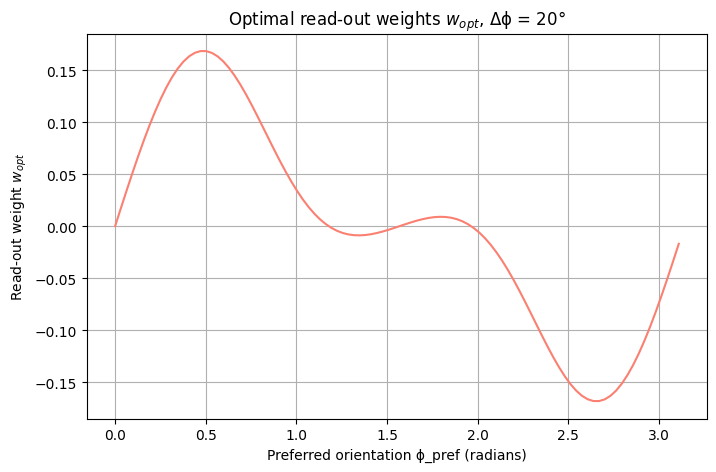

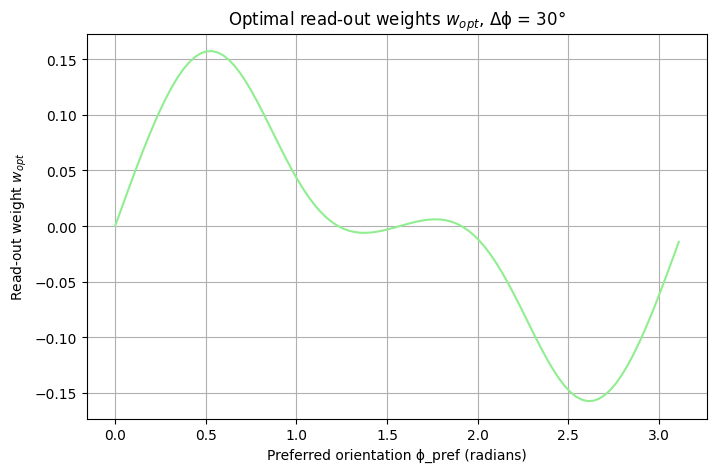

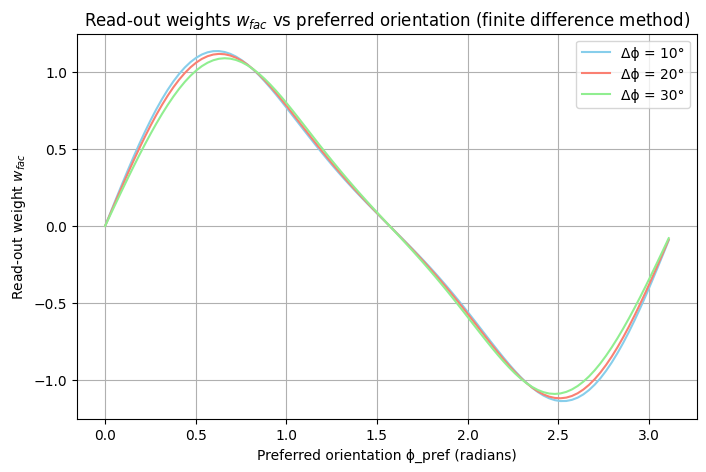

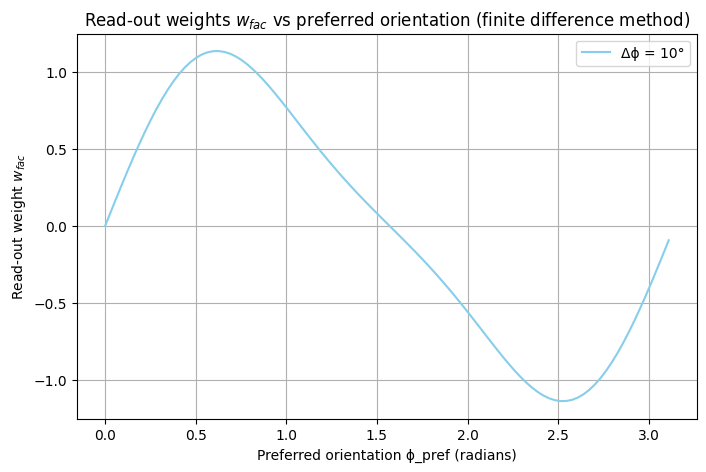

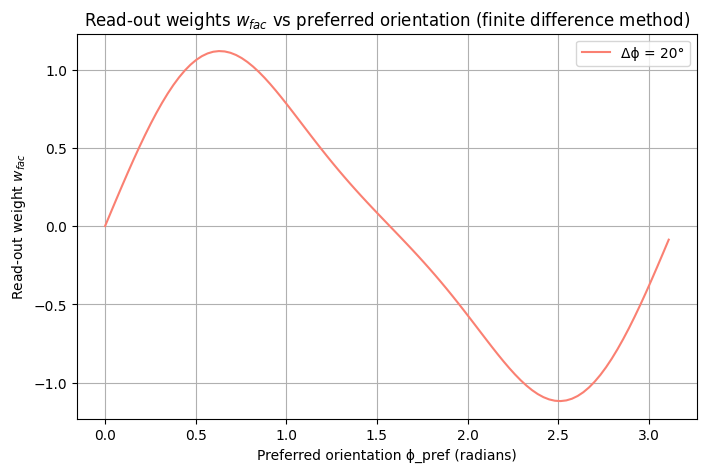

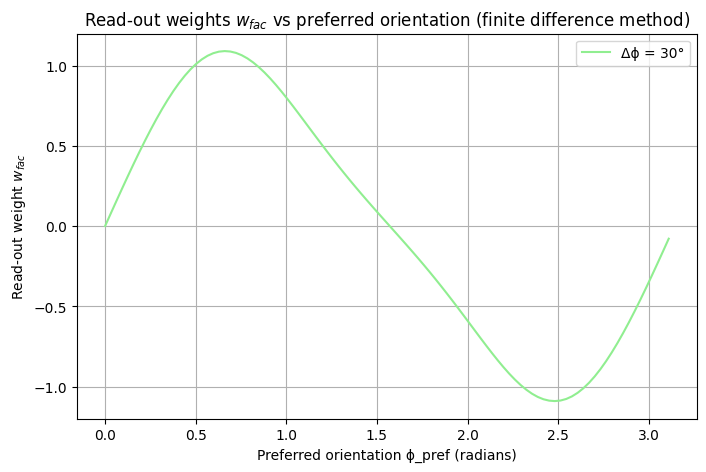

In [ ]:
C_opt_inv = np.linalg.inv(C_opt)

d_phis = np.deg2rad([10, 20, 30])
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.title("Optimal read-out weights $w_{opt}$ vs preferred orientation")
plt.xlabel("Preferred orientation ϕ_pref (radians)")
plt.ylabel("Read-out weight $w_{opt}$")

for i, dphi in enumerate(d_phis):
    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, phis, kappa = 1)
    f2 = von_mises(1, phi2, phis, kappa = 1)

    df = (f1 - f2)/dphi
    w_opt = C_opt_inv @ df

    plt.plot(phis, w_opt, label=f"Δϕ = {np.rad2deg(dphi):.0f}°", color=colors[i])

plt.legend()
plt.grid(True)
plt.show()


# Separate figure for each Δϕ
for i, dphi in enumerate(d_phis):
    plt.figure(figsize=(8, 5))
    plt.title(f"Optimal read-out weights $w_{{opt}}$, Δϕ = {np.rad2deg(dphi):.0f}°")
    plt.xlabel("Preferred orientation ϕ_pref (radians)")
    plt.ylabel("Read-out weight $w_{opt}$")

    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, phis, kappa = 1)
    f2 = von_mises(1, phi2, phis, kappa = 1)

    df = (f1 - f2) / dphi
    w_opt = C_opt_inv @ df

    plt.plot(phis, w_opt, color=colors[i])
    plt.grid(True)
    plt.show()



import numpy as np
import matplotlib.pyplot as plt

C = np.diag(f_values)
C_inv = np.linalg.inv(C)

d_phis = np.deg2rad([10, 20, 30])
colors = ['skyblue', 'salmon', 'lightgreen']

plt.figure(figsize=(8, 5))
plt.title("Read-out weights $w_{fac}$ vs preferred orientation (finite difference method)")
plt.xlabel("Preferred orientation ϕ_pref (radians)")
plt.ylabel("Read-out weight $w_{fac}$")

for i, dphi in enumerate(d_phis):

    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, nuerons)
    f2 = von_mises(1, phi2, nuerons)

    delta_f = (f1 - f2)/(dphi)
    w_fac = C_inv @ delta_f

    plt.plot(nuerons, w_fac, label=f"Δϕ = {np.rad2deg(dphi):.0f}°", color=colors[i])

plt.legend()
plt.grid(True)
plt.show()



for i, dphi in enumerate(d_phis):
    plt.figure(figsize=(8, 5))
    plt.title("Read-out weights $w_{fac}$ vs preferred orientation (finite difference method)")
    plt.xlabel("Preferred orientation ϕ_pref (radians)")
    plt.ylabel("Read-out weight $w_{fac}$")

    phi1 = dphi / 2
    phi2 = -dphi / 2

    f1 = von_mises(1, phi1, phis)
    f2 = von_mises(1, phi2, phis)

    delta_f = (f1 - f2)/(dphi)
    w_fac = C_inv @ delta_f

    plt.plot(phis, w_fac, label=f"Δϕ = {np.rad2deg(dphi):.0f}°", color=colors[i])

    plt.legend()
    plt.grid(True)
    plt.show()



There is the same pattern of a periodic function of period 2π that somewhat resembles a sign wave. The maximum and minimum of w_opt is, just like it was for w_fac, a bit larger in magnitude when Δϕ is smaller. For w_opt the maximum and minimum are more distinct and the function has high magitudes only around a much more distinct section near the -ϕ and ϕ angles. Also w_opt crosses to a negative value from around 1.3 to π/2 and then back positive from π/2 to around 1.9. This is something that w_fac did not do. The main distinction here though I believe that will affect the results of the next sections is this more peaked maximum and minimum points.

d.)

d' (correlated neurons, w_opt):  1.815
d' (correlated neurons, w_fac):  1.749


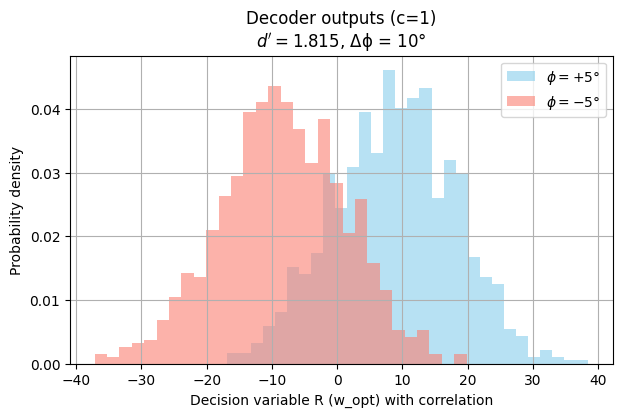

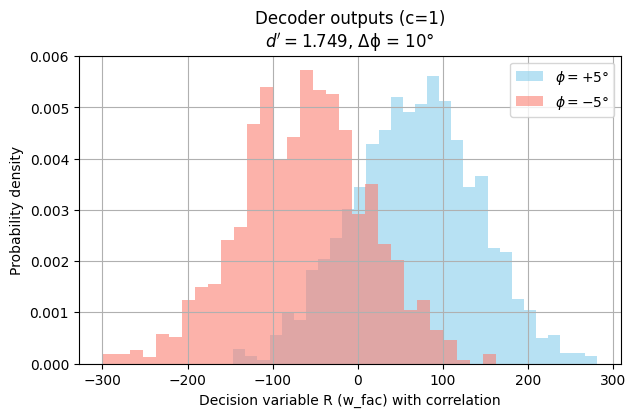

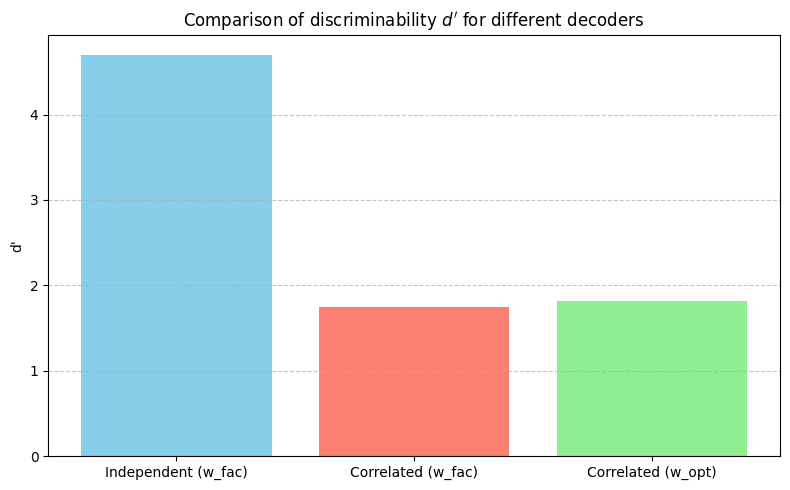

In [ ]:
f_phi1 = von_mises(c, phi_1, phis)
f_phi2 = von_mises(c, phi_2, phis)

df = (f_phi1 - f_phi2) / (phi_1 - phi_2)
w_opt = C_opt_inv @ df
w_fac = C_inv @ df

n_trials = 1000
r_phi1_corr = np.random.multivariate_normal(f_phi1, C_opt, n_trials)
r_phi2_corr = np.random.multivariate_normal(f_phi2, C_opt, n_trials)
r_phi1_corr = np.clip(np.round(r_phi1_corr), 0, None)
r_phi2_corr = np.clip(np.round(r_phi2_corr), 0, None)

R_phi1_opt = r_phi1_corr @ w_opt
R_phi2_opt = r_phi2_corr @ w_opt

R_phi1_fac = r_phi1_corr @ w_fac
R_phi2_fac = r_phi2_corr @ w_fac

def compute_dprime(R1, R2):
    return (np.mean(R1) - np.mean(R2)) / np.sqrt(0.5 * (np.var(R1) + np.var(R2)))

dprime_opt = compute_dprime(R_phi1_opt, R_phi2_opt)
dprime_fac_corr = compute_dprime(R_phi1_fac, R_phi2_fac)

print(f"d' (correlated neurons, w_opt):  {dprime_opt:.3f}")
print(f"d' (correlated neurons, w_fac):  {dprime_fac_corr:.3f}")

dprime_ind = 4.698

plt.figure(figsize=(7, 4))
plt.hist(R_phi1_opt, bins=30, alpha=0.6, color='skyblue', label=r"$\phi = +5°$", density=True)
plt.hist(R_phi2_opt, bins=30, alpha=0.6, color='salmon', label=r"$\phi = -5°$", density=True)
plt.xlabel("Decision variable R (w_opt) with correlation")
plt.ylabel("Probability density")
plt.title(f"Decoder outputs (c={c})\n$d' = {dprime_opt:.3f}$, Δϕ = 10°")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7, 4))
plt.hist(R_phi1_fac, bins=30, alpha=0.6, color='skyblue', label=r"$\phi = +5°$", density=True)
plt.hist(R_phi2_fac, bins=30, alpha=0.6, color='salmon', label=r"$\phi = -5°$", density=True)
plt.xlabel("Decision variable R (w_fac) with correlation")
plt.ylabel("Probability density")
plt.title(f"Decoder outputs (c={c})\n$d' = {dprime_fac_corr:.3f}$, Δϕ = 10°")
plt.legend()
plt.grid(True)
plt.show()


labels = ["Independent (w_fac)", "Correlated (w_fac)", "Correlated (w_opt)"]
values = [dprime_ind, dprime_fac_corr, dprime_opt]
colors = ["skyblue", "salmon", "lightgreen"]

plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.ylabel("d'")
plt.title("Comparison of discriminability $d'$ for different decoders")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The independent neurons with w_fac does the best at discrimination by a fair ways. When examining the correlated neurons it seems that the optimal weights w_opt does slightly better since the d' value is typically slightly higher.




e.)

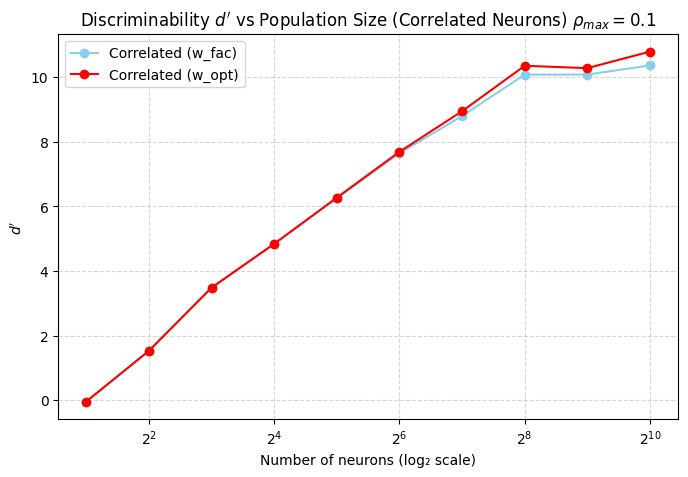

/tmp/ipython-input-778952165.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


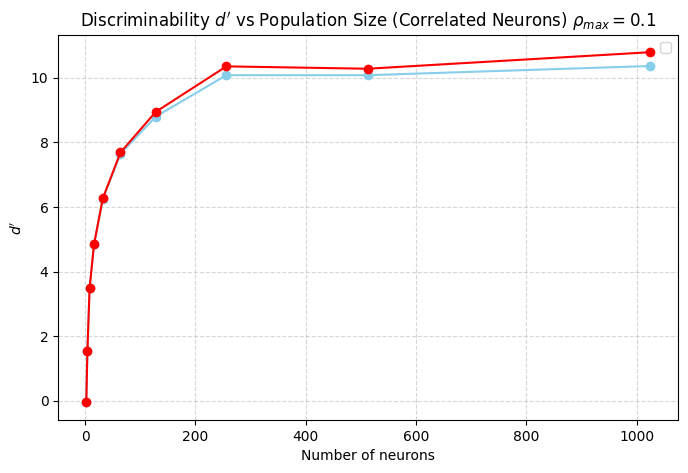

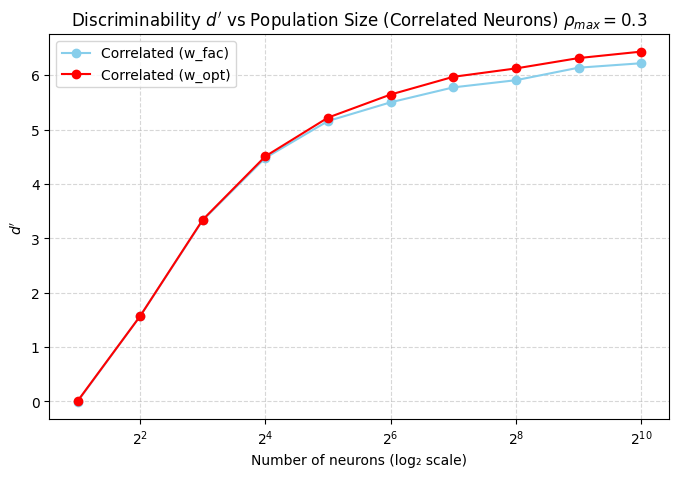

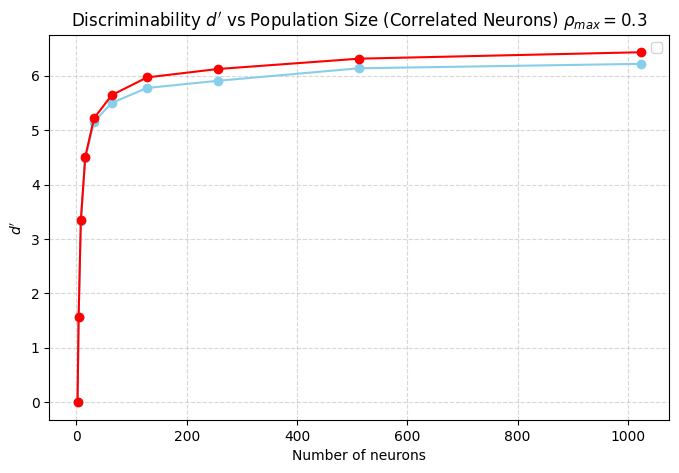

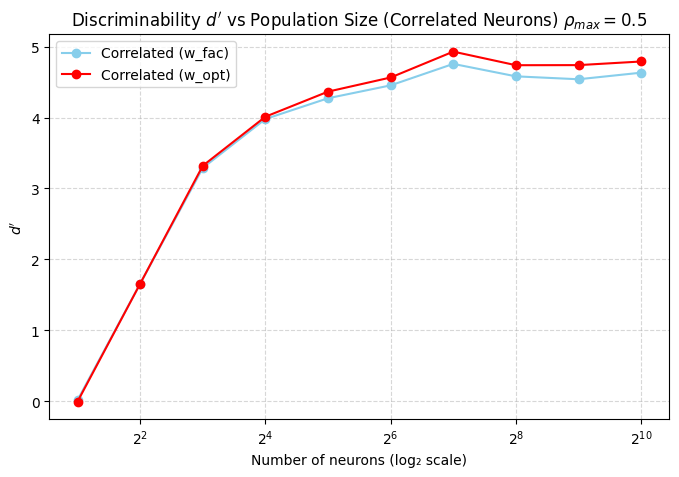

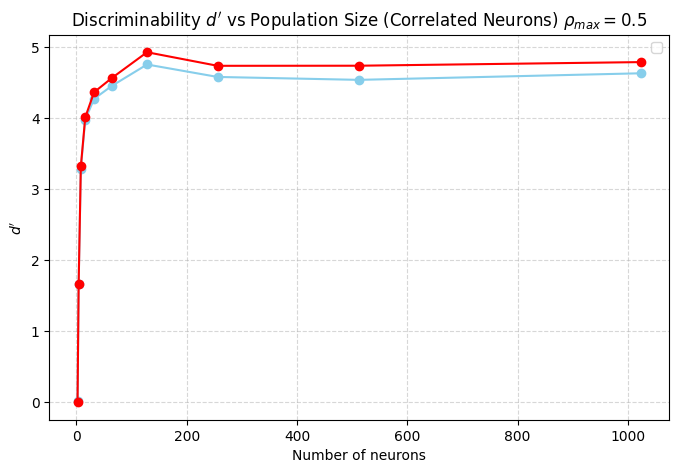

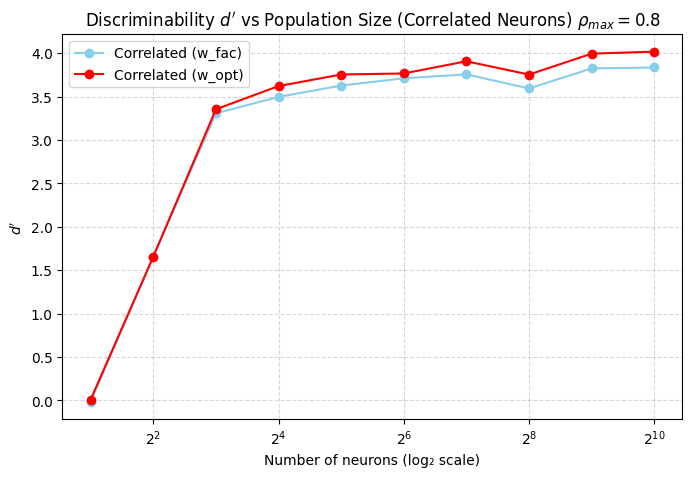

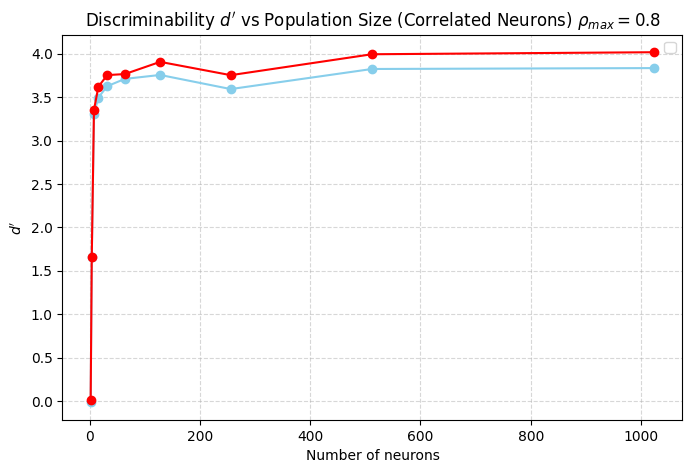

In [ ]:
for rho_max in [0.1, 0.3, 0.5, 0.8]:
  n_values = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

  tau = 0.5

  d_prime_vals_fac = []
  d_prime_vals_opt = []

  for N in n_values:
      phis = np.linspace(0, np.pi, N)

      f_phi1 = von_mises(c, phi1, phis, kappa=1)
      f_phi2 = von_mises(c, phi2, phis, kappa=1)

      df = (f_phi1 - f_phi2) / (phi1 - phi2)

      rho = np.zeros((N, N))
      for i in range(N):
        for j in range(N):
          if i == j:
              rho[i, j] = 1.0
          else:
              delta_phi = np.abs(np.mod(np.abs(phis[i] - phis[j]) + np.pi/2, np.pi) - np.pi/2)
              rho[i, j] = rho_max * np.exp(-delta_phi / tau)


      f_values = von_mises(c, 0, phis)

      C_opt = np.zeros((N, N))
      for i in range(N):
        for j in range(N):
          C_opt[i, j] = rho[i, j] * np.sqrt(f_values[i] * f_values[j])

      C_inv = np.linalg.inv(np.diag(f_values))
      C_opt_inv = np.linalg.inv(C_opt)
      w_fac = C_inv @ df
      w_opt = C_opt_inv @ df

      n_trials = 1000

      r_phi1_corr = np.random.multivariate_normal(f_phi1, C_opt, n_trials)
      r_phi2_corr = np.random.multivariate_normal(f_phi2, C_opt, n_trials)
      r_phi1_corr = np.clip(np.round(r_phi1_corr), 0, None)
      r_phi2_corr = np.clip(np.round(r_phi2_corr), 0, None)

      R_phi1_opt = r_phi1_corr @ w_opt
      R_phi2_opt = r_phi2_corr @ w_opt

      R_phi1_fac = r_phi1_corr @ w_fac
      R_phi2_fac = r_phi2_corr @ w_fac

      dprime_opt = compute_dprime(R_phi1_opt, R_phi2_opt)
      dprime_fac_corr = compute_dprime(R_phi1_fac, R_phi2_fac)

      d_prime_vals_fac.append(dprime_fac_corr)
      d_prime_vals_opt.append(dprime_opt)


  plt.figure(figsize=(8,5))
  plt.plot(n_values, d_prime_vals_fac, marker='o', color='skyblue', label='Correlated (w_fac)')
  plt.plot(n_values, d_prime_vals_opt, marker='o', color='red', label='Correlated (w_opt)')
  plt.xscale('log', base=2)
  plt.xlabel("Number of neurons (log₂ scale)")
  plt.ylabel(r"$d'$")
  plt.title(r"Discriminability $d'$ vs Population Size (Correlated Neurons) $\rho_{max} = $" + str(rho_max))
  plt.grid(True, which="both", ls="--", alpha=0.5)
  plt.legend()
  plt.show()

  plt.figure(figsize=(8,5))
  plt.plot(n_values, d_prime_vals_fac, marker='o', color='skyblue')
  plt.plot(n_values, d_prime_vals_opt, marker='o', color='red')
  plt.xlabel("Number of neurons")
  plt.ylabel(r"$d'$")
  plt.title(r"Discriminability $d'$ vs Population Size (Correlated Neurons) $\rho_{max} = $" + str(rho_max))
  plt.grid(True, which="both", ls="--", alpha=0.5)
  plt.legend()
  plt.show()

An issue comparing these directly to 1e is that 1e used c = 0.1 wehile here we use c = 1. A higher contrast leads to better discriminability so we shouldn't compare the values of the graph directly. Instead we can compare the shapes. The shapes of these graphs also grow assymptotically, but it looks as if they level of quicker kand have a steeps slope when the number of neurons is small. For the vector of ρ_max of [0.1, 0.3, 0.5, 0.8] to reach 95% accuracy we require around 8 neurons for all of the values. This is about where the higher ρ_max levels start to flatten in the d' graph. I suppose that all values of ρ_max are very similar for around the first 10 neurons and then the lower values allow d' to grow very large, for example look at ρ_max = 0.1 where d' can attain a value of 10 or larger.